# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.backend import backend
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


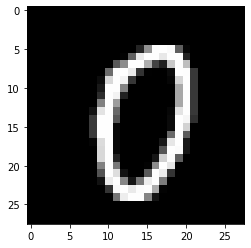

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
X_train4 = X_train[y_train<=4]
X_train5 = X_train[y_train>4]

y_train4 = y_train[y_train<=4]
y_train5 = y_train[y_train>4]


X_test4 = X_test[y_test<=4]
X_test5 = X_test[y_test>4]

y_test4 = y_test[y_test<=4]
y_test5 = y_test[y_test>4]

In [5]:
X_train4.shape

(30596, 28, 28)

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [6]:
print("Shape of x_train4 is:" ,X_train4.shape)
print("Shape of X_test4 is:" ,X_test4.shape)

print("Shape of y_train4 is:", y_train4.shape)
print("Shape of y_test4 is:", y_test4.shape)

print("Shape of x_train5 is:" ,X_train5.shape)
print("Shape of X_test5 is:",X_test5.shape)

print("Shape of y_train5 is:" ,y_train5.shape)
print("Shape of y_test5 is:", y_test5.shape)

Shape of x_train4 is: (30596, 28, 28)
Shape of X_test4 is: (5139, 28, 28)
Shape of y_train4 is: (30596,)
Shape of y_test4 is: (5139,)
Shape of x_train5 is: (29404, 28, 28)
Shape of X_test5 is: (4861, 28, 28)
Shape of y_train5 is: (29404,)
Shape of y_test5 is: (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train4 = X_train4.reshape(X_train4.shape[0], 28, 28, 1)
X_test4 = X_test4.reshape(X_test4.shape[0], 28, 28, 1)

In [0]:
X_train4 = X_train4.astype('float32')
X_test4 = X_test4.astype('float32')

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
import numpy as np

In [0]:
X_train4 /=255
X_test4 /= 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [11]:
print('X_train4 shape:', X_train4.shape)
print('Number of images in X_train4:', X_train4.shape[0])
print('Number of images in X_test4:', X_test4.shape[0])


X_train4 shape: (30596, 28, 28, 1)
Number of images in X_train4: 30596
Number of images in X_test4: 5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

ytrain4 = np_utils.to_categorical(y_train4, 5)
ytest4 = np_utils.to_categorical(y_test4, 5)

Using TensorFlow backend.


In [13]:
print(ytrain4.shape)
ytrain4[0]


(30596, 5)


array([1., 0., 0., 0., 0.], dtype=float32)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [14]:
# Clearing the session first
from keras.backend import clear_session
input_shape = (28, 28, 1)
clear_session()
# Define sequential
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,name='conv_1'))
#model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, (3, 3), activation='relu',name='conv_2'))

# Add Max Pooling
model1.add(MaxPooling2D(pool_size=(2, 2) ,name='max_1'))

# Add Dropout layer
model1.add(Dropout(0.2,name='drop_1'))










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
# Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128, activation ='relu', name = 'dense_1'))

    # Prediction Layer
    model1.add(Dense(5, activation  ='softmax', name = 'dense_2'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [16]:
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Train the model2
TRAIN = False
BATCH_SIZE = 128
EPOCHS = 10
model1.fit(X_train4, ytrain4, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(X_test4, ytest4))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30596 samples, validate on 5139 samples
Epoch 1/10





30596/30596 [==============================] - 5s 160us/step - loss: 0.5718 - acc: 0.8449 - val_loss: 0.2770 - val_acc: 0.9054
Epoch 2/10
30596/30596 [==============================] - 3s 95us/step - loss: 0.1419 - acc: 0.9558 - val_loss: 0.0893 - val_acc: 0.9739
Epoch 3/10
30596/30596 [==============================] - 3s 94us/step - loss: 0.1206 - acc: 0.9618 - val_loss: 0.3196 - val_acc: 0.8741
Epoch 4/10
30596/30596 [==============================] - 3s 93us/step - loss: 0.1114 - acc: 0.9654 - val_loss: 0.0976 - val_acc: 0.9689
Epoch 5/10
30596/30596 [==============================] - 3s 95us/step - loss: 0.1011 - acc: 0.9688 - val_loss: 0.0748 - val_acc: 0.9780
Epoch 6/10
30596/30596 [==============================] - 3s 94us/step - loss: 0.0931 - acc: 0.9712 - val_loss: 0.0570 - val_acc: 0.9837
Epoch 7/10
30596/30596 [

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [17]:
loss_and_metrics = model1.evaluate(X_test4, ytest4)
print(loss_and_metrics)

5139/5139 [==============================] - 0s 81us/step
[0.04297066458971567, 0.9881299863786729]


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model1.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False     

### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [19]:
print(X_train5.shape)
print(X_test5.shape)
print(y_train5.shape)
print(y_test5.shape)



(29404, 28, 28)
(4861, 28, 28)
(29404,)
(4861,)


In [0]:
# subtracting 5 from the dataset
y_train_5 = y_train5-5
y_test_5 = y_test5-5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train5= X_train5.reshape(X_train5.shape[0], 28, 28, 1)
X_test5 = X_test5.reshape(X_test5.shape[0], 28, 28, 1)
X_train5 = X_train5.astype('float32')
X_test5 = X_test5.astype('float32')

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train5 /= 255
X_test5 /=255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [23]:
print('X_train5 shape:', X_train5.shape)
print('Number of images in X_train5:', X_train5.shape[0])
print('Number of images in X_test5:', X_test5.shape[0])

X_train5 shape: (29404, 28, 28, 1)
Number of images in X_train5: 29404
Number of images in X_test5: 4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
ytrain5 = np_utils.to_categorical(y_train_5, 5)
ytest5 = np_utils.to_categorical(y_test_5, 5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [25]:
TRAIN = False
BATCH_SIZE = 128
EPOCHS = 10
#model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train5, ytrain5, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(X_test5, ytest5))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 3s 97us/step - loss: 0.3847 - acc: 0.8782 - val_loss: 0.1900 - val_acc: 0.9381
Epoch 2/10
29404/29404 [==============================] - 3s 95us/step - loss: 0.1856 - acc: 0.9400 - val_loss: 0.1472 - val_acc: 0.9498
Epoch 3/10
29404/29404 [==============================] - 3s 95us/step - loss: 0.1506 - acc: 0.9503 - val_loss: 0.1239 - val_acc: 0.9566
Epoch 4/10
29404/29404 [==============================] - 3s 93us/step - loss: 0.1302 - acc: 0.9584 - val_loss: 0.1076 - val_acc: 0.9642
Epoch 5/10
29404/29404 [==============================] - 3s 95us/step - loss: 0.1203 - acc: 0.9607 - val_loss: 0.1010 - val_acc: 0.9646
Epoch 6/10
29404/29404 [==============================] - 3s 93us/step - loss: 0.1100 - acc: 0.9642 - val_loss: 0.0941 - val_acc: 0.9685
Epoch 7/10
29404/29404 [==============================] - 3s 93us/step - loss: 0.1011 - acc: 0.9680 - val_loss: 0.0829 - val_acc:

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [26]:
score = model1.evaluate(X_test5, ytest5)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4861/4861 [==============================] - 0s 81us/step
Test loss: 0.07734894989078683
Test accuracy: 0.9732565317127445


In [75]:
y_pred_test5 = model1.predict(X_test5)
y_pred_train5 = model1.predict(X_train5)

# Finding the accuracy:

accuracy2 = accuracy_score(ytrain5.argmax(axis=1), y_pred_train5.argmax(axis=1))
print("The accuracy of train data is", round(accuracy2*100, 2))

accuracy1 = accuracy_score(ytest5.argmax(axis=1), y_pred_test5.argmax(axis=1))
print("The accuracy of test data is", round(accuracy1*100, 2))

The accuracy of train data is 97.73
The accuracy of test data is 97.33


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
df = pd.read_csv('tweets.csv', encoding ='latin')

In [29]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Drop null values
- drop all the rows with null values

In [33]:
print(df.shape)
df.dropna(inplace =True)


(9093, 3)


In [34]:
print(df.shape)
# Final result after clearing the null data

(3291, 3)


### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [35]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
# Converting it in lower characters and removing special characters
import re
df = df.applymap(lambda s: s.lower())
df =df.applymap(lambda s: re.sub('[^0-9a-z #+_]'," ", s))

print dataframe

In [42]:
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs twe...,iphone,negative emotion
1,jessedee know about fludapp awesome ipad i...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also the...,ipad,positive emotion
3,sxsw i hope this year s festival isn t as cra...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa m...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [56]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i can t tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
# Need to pick the positive and negative emotions only.
tweets_df = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['negative emotion', 'positive emotion'])]

In [58]:
tweets_df.head()
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [59]:
# Encoding labels

tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].map({'negative emotion' : 0,                                                                                                                                       'positive emotion' : 1})
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array([0, 1])

In [60]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs twe...,iphone,0
1,jessedee know about fludapp awesome ipad i...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also the...,ipad,1
3,sxsw i hope this year s festival isn t as cra...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa m...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = tweets_df['tweet_text'] # Feature
Y = tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] # Label / Target

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
# Splitting into train and test datasets

from sklearn.model_selection import train_test_split
X_train_T, X_test_T, Y_train_T, Y_test_T = train_test_split(X, Y, test_size = 0.25, random_state = 9)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# Vectorizing the data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
X_train_Vect = vectorizer.fit_transform(X_train_T)
X_test_Vect = vectorizer.transform(X_test_T)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [0]:
model_LR = LR.fit(X_train_Vect, Y_train_T)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB
MultNB = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [0]:
model_MultNB = MultNB.fit(X_train_Vect, Y_train_T)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
Y_pred_LR = model_LR.predict(X_test_Vect)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
Y_pred_MultNB = model_MultNB.predict(X_test_Vect)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [73]:
from sklearn.metrics import accuracy_score

accuracy_LR = accuracy_score(Y_test_T, Y_pred_LR)
print("The accuracy of Logistic Regression data is", round(accuracy_LR*100, 2))

The accuracy of Logistic Regression data is 86.97


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [74]:
accuracy_MultNB = accuracy_score(Y_test_T, Y_pred_MultNB)
print("The accuracy of Logistic Regression data is", round(accuracy_MultNB*100, 2))

The accuracy of Logistic Regression data is 85.59
